# Correcting the melanopic action spectrum for age



## A.4 The melanopic action spectrum (from CIE S 026/E:2018)


The following steps have been adopted to derive the melanopic action spectrum as employed in this standard (see also Lucas et al. (2014), and CIE (2015):

1) The action spectrum of the human melanopsin protein can be described by an (opsin:vitamin A)-based photopigment template ([Govardovskii et al., 2000](https://www.cambridge.org/core/journals/visual-neuroscience/article/abs/in-search-of-the-visual-pigment-template/A4738E821720092B7F5A233C4AB4962B)) with a peak around 480 nm ([Bailes and Lucas, 2013](https://royalsocietypublishing.org/doi/full/10.1098/rspb.2012.2987), and the review by [Lucas et al., 2014](https://www.sciencedirect.com/science/article/pii/S0166223613001975)). This yields an action spectrum that is consistent with the spectral sensitivities recorded for melanopsin-driven responses in several other mammalian species (including primates) ([Berson et al., 2002](https://www.science.org/doi/abs/10.1126/science.1067262); [Dacey et al., 2005](https://www.nature.com/articles/nature03387); [Lucas et al., 2001](https://www.nature.com/articles/nn0601_621)). Moreover, the action spectrum for a persistent pupil constriction in humans following a bright light flash (the so-called post-illumination pupil response), which has been attributed to melanopsin in primates, is consistent with the template-based melanopsin action spectrum ([Gamlin et al., 2007](https://www.sciencedirect.com/science/article/pii/S0042698906005682)).

2) The physical self-screening adjustment to account for the optical pigment density of melanopsin in ipRGCs is considered negligible.

3) A pre-receptoral filtering adjustment is applied to account for the optical path to the peripheral retina. This adjustment is based on the pre-receptoral filtering for a reference observer of age 32 years as adopted in ([Lucas et al., 2014](https://www.sciencedirect.com/science/article/pii/S0166223613001975)) and detailed in (CIE, 2015). Moreover, the influence of macular pigment on the melanopsin action spectrum is considered negligible (i.e. there is no allowance for macular pigment in $S_{mel}(\lambda)$).

4) The melanopsin action spectrum as obtained in Step 3 is adjusted from the spectral photon system to the spectral (energy-based) radiometric system.

5) The melanopsin action spectrum as obtained in Step 4 is normalized to have a maximum value of 1. This contrasts with [Lucas et al. (2014)](https://www.sciencedirect.com/science/article/pii/S0166223613001975), where the melanopsin sensitivity function (of Step 4) is normalized so that an equi-energy source (E) with a given illuminance would produce the same spectrally weighted quantities for all five photoreceptors.

An additional potential consideration in defining the melanopic action spectrum is the possibility that melanopsin may be a so-called bi (or tri) stable photopigment ([Emanuel and Do, 2015](https://www.sciencedirect.com/science/article/pii/S0896627315001002)). Bistable pigments form a thermally stable state upon light exposure that is itself light sensitive and can switch off signalling upon photon absorption. In such pigments, responses to one wavelength of light can be strongly impacted by exposure to a second wavelength to which the photoproduct is very sensitive. In theory then, estimates of melanopsin spectral sensitivity based upon action spectra derived from exposure to narrow-band or monochromatic sources are not necessarily predictive for responses to polychromatic stimuli. In practice, explicit tests of this possibility have indicated that it is not a significant consideration in vivo ([Gamlin et al., 2007](https://www.sciencedirect.com/science/article/pii/S0042698906005682); [Enezi et al., 2011](https://journals.sagepub.com/doi/abs/10.1177/0748730411409719); [Bailes and Lucas, 2013](https://royalsocietypublishing.org/doi/full/10.1098/rspb.2012.2987); [Brown et al., 2013](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0053583)).

## A.5 Pre-receptoral filtering and spectral age correction (from CIE S 026/E:2018)


The human lens becomes less transparent and yellows with age ([Pokorny et al., 1987](https://opg.optica.org/ao/abstract.cfm?uri=ao-26-8-1437)). The action spectra provided in ([Lucas et al. (2014)](https://www.sciencedirect.com/science/article/pii/S0166223613001975)) are based on pre-receptoral filtering for a reference observer of age 32 years, chosen as to be comparable to the age of the CIE 1931 standard colorimetric observer, see also (CIE, 2015). For observers of a different age a spectral correction may be applied. The correction can be based on the age-dependent transmittance function (CIE, 2012). It is emphasized that these corrections apply to averages, as there is considerable individual variation ([Mellerio, 1987](https://www.sciencedirect.com/science/article/abs/pii/0042698987901660)) and ageing of the lens accelerates in tropical environments ([Luthra et al., 1994](https://febs.onlinelibrary.wiley.com/doi/abs/10.1016/0014-5793(94)00635-0)). People who have undergone cataract surgery can have an increased transmittance in the short wavelength range and may need a dedicated spectral correction for their pre-receptoral filtering.

In September 2012, the CIE published an erratum to (CIE, 2012), which gives the approximate function for the absolute transmission of the human eye for wavelengths from 300 nm to 700 nm for large field sizes. However, this function is considered to remain broadly valid up to 780 nm. Therefore, the function has been applied up to 780 nm to calculate the age-related data in Figure A.1 and Table A.3. Note that this approach is slightly different to the one used in [Lucas et al. (2014)](https://www.sciencedirect.com/science/article/pii/S0166223613001975) and to the one used in (CIE, 2006).

Since the absolute transmittance for a 32-year-old observer is already included in the melanopic action spectrum, $S_{mel}(\lambda)$, it follows that when determining the correction function for age, this correction, too, has to be related to a 32-year-old reference observer. This is done by defining the correction function to be 1 at all wavelengths for $\alpha$ = 32 years and calculating the spectral correction function $c(a,\lambda)$ for wavelength $\lambda$ and age $\alpha$ from the ratio of the transmittance function $S_{mel}(\lambda)$ to the transmittance function $\tau(32, \lambda)$ for age 32 years, these transmittance functions being as defined by CIE (2012).

$c(\alpha,\lambda) = \frac{\tau(\alpha, \lambda)}{\tau(32, \lambda)}$

![](../../img/mel_spectral_correction_function.png)

## My implementation

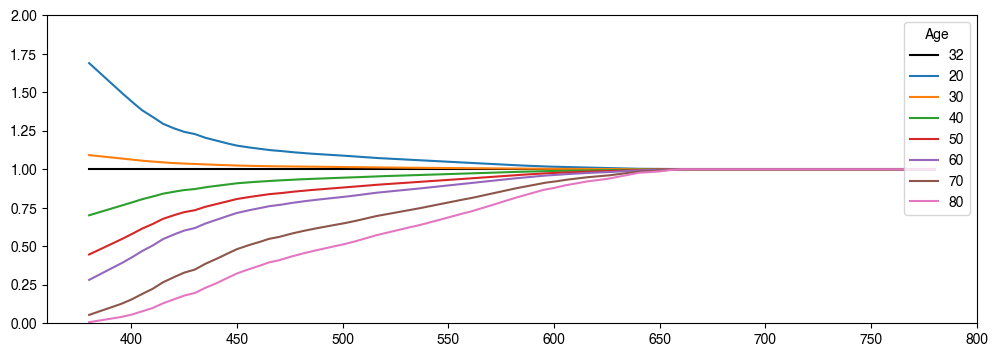

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from pysilsub.CIE import (
    get_CIEPO06_optical_density,
    get_CIEPO06_macula_density,
)
from pysilsub.observers import StandardColorimetricObserver

# Get density spectra for lens and other ocular media
lomd = get_CIEPO06_optical_density().squeeze()

# Function to correct for age
def get_lens_density_spectrum(age):
    if age <= 60.0:
        correct_lomd = lomd["D_ocul_1"].mul(1 + 0.02 * (age - 32)) + lomd["D_ocul_2"]
    else:
        correct_lomd = (
            lomd["D_ocul_1"].mul(1.56 + 0.0667 * (age - 60)) + lomd["D_ocul_2"]
        )
    return correct_lomd

# Wavelength range
wls = list(range(380, 781, 1))

# 32 year standard
ld32 = get_lens_density_spectrum(32)
t32 = 10**(-ld32)*100  # transmittance

# Spectral correction functions
ages = [20, 30, 40, 50, 60, 70, 80]
corrections = []
for age in ages:
    ld = get_lens_density_spectrum(age)  # density
    lt = (10**-ld)*100  # transmittance
    c = lt/t32  # spectral correction function
    interpfunc = interp1d(c.index.values, c, fill_value='extrapolate')  # problem??
    corrections.append(interpfunc(list(range(380, 781, 1))))

# Plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(wls, np.ones(401), c='k', label=32)
for a, c in zip(ages, corrections):
    ax.plot(wls, c, label=a)
ax.legend(title='Age', loc='upper right')
ax.set_ylim((0, 2));


## Spectral correction of standard observer melopsin action spectrum 

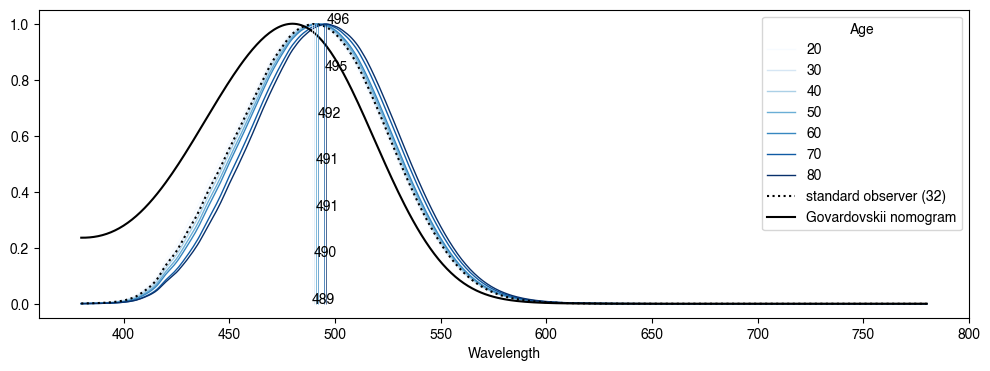

In [9]:
standard_observer = StandardColorimetricObserver()

mel = standard_observer.action_spectra.mel

fig, ax = plt.subplots(figsize=(12, 4))


colors = plt.cm.Blues(np.linspace(0,1, len(corrections)))
corrected_mel = []
for age, c, color in zip(ages, corrections, colors):
    new = mel * (10**-np.exp(-c))  # Apply spectral correction    
    new = new.div(new.max())  # Normalise
    new.plot(ax=ax, label=age, c=color, lw=1)
    corrected_mel.append(new)
    
ax.plot(wls, mel, c='k', ls=':', label='standard observer (32)')
nomogram = pd.read_csv("~/Code/test.csv", header=None)
nomogram.index = range(380, 781, 1)
ax.plot(nomogram, label='Govardovskii nomogram', c='k')
ax.legend(title='Age')

lmax = [wls[cm.argmax()] for cm in corrected_mel]
ylocs = np.linspace(0, 1, len(ages))
for y, l, c in zip(ylocs, lmax, colors):
    ax.text(int(l), y, l)
    ax.vlines(l, 0, 1, color=c, lw=.5)


## Bit different to Manuel's paper...

![](../../img/melanopsin_action_spectrum_spitschan.png)

# There is an alternative lens function

For some reason, a different function is used for melanopsin. Using this function, lens density correction functions look more like those from the standard. 

\begin{multline*}
D_{\tau, media}(\lambda) = (0.15 + 0.000031 \cdot a^2) \cdot (400/(\lambda))4\\
+ 14.19 \times 10.68 \cdot exp( – {[ 0.057 \cdot (\lambda\ – 273)]2 })\\
+ (1.05 – 0.000 063 \cdot a2) \cdot 2.13 \cdot exp( – {[0.029 \cdot (\lambda – 370)]2 })\\
+ (0.059 + 0.000 186 \cdot a2) \cdot 11.95 \cdot exp( – {[0.021 \cdot (\lambda– 325)]2 })\\ 
+ (0.016 + 0.000 132 \cdot a2) \cdot 1.43 \cdot exp( – {[0.008 \cdot (\lambda – 325)]2 }) + 0.06
\end{multline*}


In [13]:

def get_CIE_203_2012_lens_density(age, wls):
    return (
        (0.15 + 0.000031 * (age**2)) * (400 / wls) ** 4
        + (14.19 * 10.68) * np.exp(-((0.057 * (wls - 273)) ** 2))
        + (1.05 - 0.000063 * (age**2))
        * 2.13
        * np.exp(-((0.029 * (wls - 370)) ** 2))
        + (0.059 + 0.000186 * (age**2))
        * 11.95
        * np.exp(-((0.021 * (wls - 325)) ** 2))
        + (0.016 + 0.000132 * (age**2))
        * 1.43
        * np.exp(-((0.008 * (wls - 325)) ** 2) + 0.06)
    )


![](../../img/mel_spectral_correction_function.png)

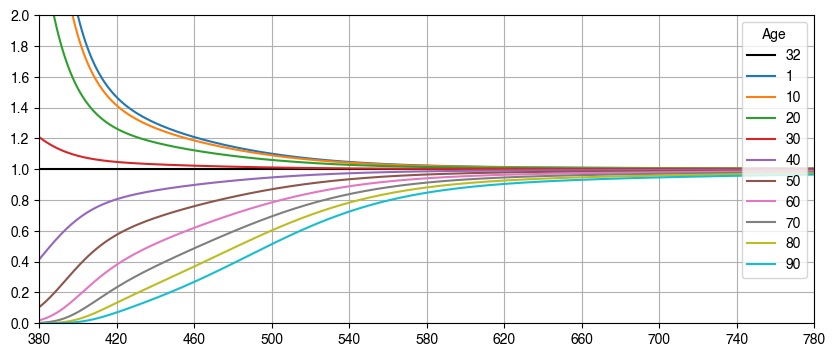

In [14]:
# Wavelength range
wls = np.arange(380, 781, 1)

# 32 year standard
ld32 = get_CIE_203_2012_lens_density(32, wls)
t32 = 10**(-ld32)*100  # transmittance

# Spectral correction functions
wls = np.arange(380, 781, 1)
ages = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90]
corrections = []
for age in ages:
    ld = get_CIE_203_2012_lens_density(age, wls)  # density
    lt = (10**-ld)*100  # transmittance
    c = pd.Series(lt/t32, index=wls)  # spectral correction function
    interpfunc = interp1d(c.index.values, c, fill_value='extrapolate')  # problem??
    corrections.append(interpfunc(list(range(380, 781, 1))))

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(wls, np.ones(401), c='k', label=32)
for a, c in zip(ages, corrections):
    ax.plot(wls, c, label=a)
ax.legend(title='Age', loc='upper right')
ax.set_ylim((0, 2))
ax.set_yticks(np.arange(0, 2.1, .2))
ax.set_xticks(np.arange(380, 7801, 40))
ax.set_xlim((380,780))
ax.grid()


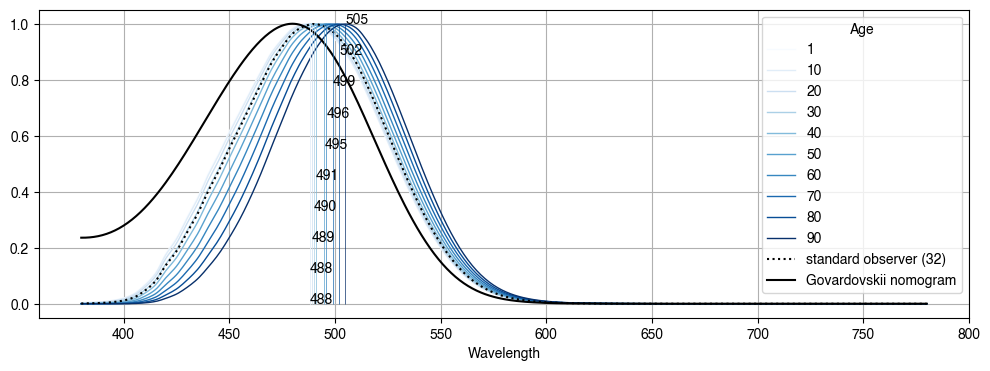

In [18]:
standard_observer = StandardColorimetricObserver()

mel = standard_observer.action_spectra.mel

fig, ax = plt.subplots(figsize=(12, 4))


colors = plt.cm.Blues(np.linspace(0,1, len(corrections)))
corrected_mel = []
for age, c, color in zip(ages, corrections, colors):
    new = mel * c # (10**-np.exp(-c))  # Apply spectral correction    
    new = new.div(new.max())  # Normalise
    new.plot(ax=ax, label=age, c=color, lw=1)
    corrected_mel.append(new)
    
ax.plot(wls, mel, c='k', ls=':', label='standard observer (32)')
nomogram = pd.read_csv("~/Code/test.csv", header=None)
nomogram.index = range(380, 781, 1)
ax.plot(nomogram, label='Govardovskii nomogram', c='k')
ax.legend(title='Age')

lmax = [wls[cm.argmax()] for cm in corrected_mel]
ylocs = np.linspace(0, 1, len(ages))
for y, l, c in zip(ylocs, lmax, colors):
    ax.text(int(l), y, l)
    ax.vlines(l, 0, 1, color=c, lw=.5)
    
ax.grid()

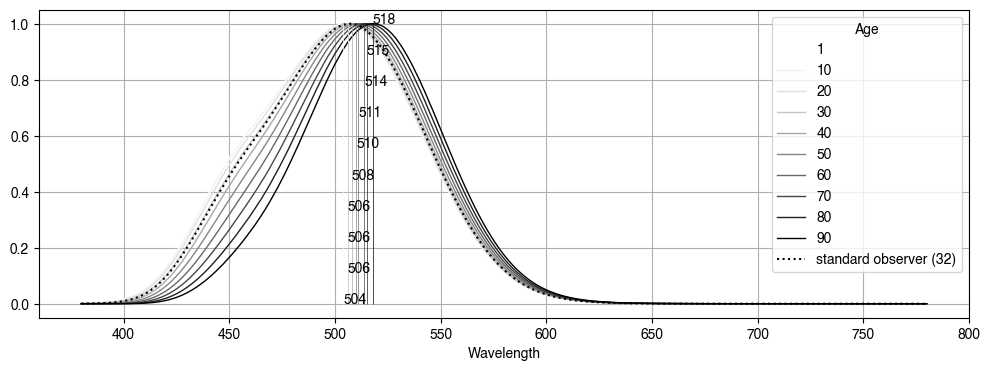

In [16]:
rh = standard_observer.action_spectra.rh

fig, ax = plt.subplots(figsize=(12, 4))


colors = plt.cm.Greys(np.linspace(0,1, len(corrections)))
corrected_rh = []
for age, c, color in zip(ages, corrections, colors):
    new = rh * c # (10**-np.exp(-c))  # Apply spectral correction    
    new = new.div(new.max())  # Normalise
    new.plot(ax=ax, label=age, c=color, lw=1)
    corrected_rh.append(new)
    
ax.plot(wls, rh, c='k', ls=':', label='standard observer (32)')
ax.legend(title='Age')

lmax = [wls[cm.argmax()] for cm in corrected_rh]
ylocs = np.linspace(0, 1, len(ages))
for y, l, c in zip(ylocs, lmax, colors):
    ax.text(int(l), y, l)
    ax.vlines(l, 0, 1, color=c, lw=.5)
    
ax.grid()